In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [5]:
path="HR_comma_sep.csv"
df=pd.read_csv(path)

df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
left_number= df[df.left== 0]
len(left_number)


11428

In [23]:
not_left_number= df[df.left== 1]
len(not_left_number)

3571

In [25]:
# relation between time spend in company and left
from matplotlib import pyplot as plt

<Axes: xlabel='time_spend_company'>

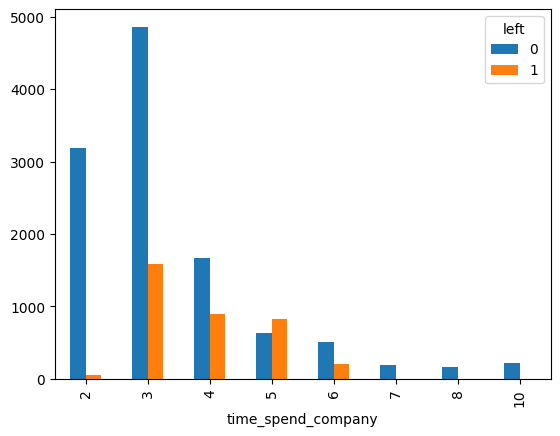

In [31]:
pd.crosstab(df['time_spend_company'],df["left"]).plot(kind='bar')

this represent that if the person with high experence is lessly like to left the jobs

<Axes: xlabel='salary'>

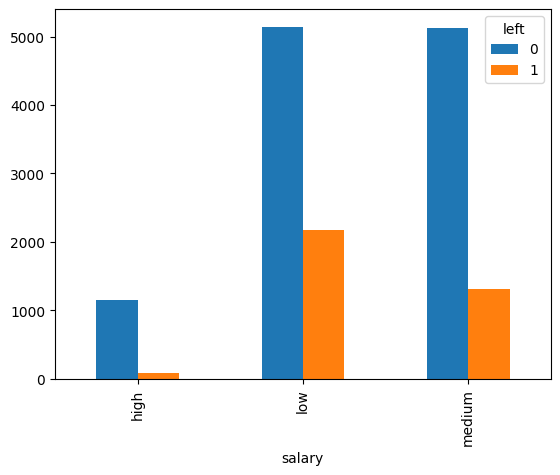

In [33]:
pd.crosstab(df['salary'], df['left']).plot(kind='bar')

this represent person with high salary is less likely to left the job

<Axes: xlabel='satisfaction_level'>

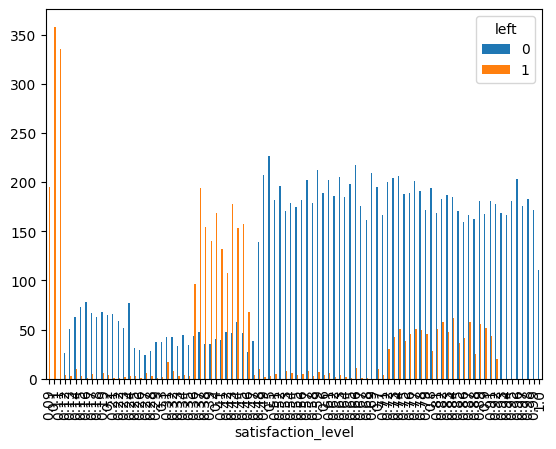

In [38]:
# relation between satisfaction level and left

pd.crosstab(df['satisfaction_level'],df["left"]).plot(kind='bar')

**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary**
#this are the parameter which have direct relation whether the person left or not left the job

In [47]:
x= df[['satisfaction_level','average_montly_hours','promotion_last_5years', 'salary']]
x

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [48]:
salary= pd.get_dummies(df['salary'], prefix='salary_')
salary

,salary__high,salary__low,salary__medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [51]:
concat_data= pd.concat([x, salary], axis='columns')
concat_data= concat_data.drop(['salary'], axis='columns')
concat_data

,satisfaction_level,average_montly_hours,promotion_last_5years,salary__high,salary__low,salary__medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [60]:

x= concat_data
y= df.left
x_train, x_test , y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=10)


In [61]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [63]:
model.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0])

In [64]:
y_test

13982    0
822      1
13751    0
9656     0
13497    0
        ..
3876     0
11504    0
2435     0
5161     0
5184     0
Name: left, Length: 3000, dtype: int64

In [65]:
model.score(x_test,y_test)

0.7706666666666667

In [68]:
model.predict([[0.40,151,0,0,1,0]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])